In [ ]:
!pip install xmltodict

In [ ]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import xmltodict
# XML을 json처럼 parsing
from tqdm.auto import tqdm
# 오래걸리는 반복문 시각화

In [ ]:
# plt.style.use(['seaborn-white'])

# 경로는 알아서 ㅎㅎ
PATH = '/content/drive/MyDrive/Colab Notebooks/mask_dataset'

# path에 파일을 확인
os.listdir(PATH)

"""
Prediction
['images', 'annotations']
"""

"\nPrediction\n['images', 'annotations']\n"

In [ ]:
# 라벨(어노테이션)과 이미지의 경로를 지정
ANNOTATION_PATH = os.path.join(PATH, "annotations")
IMAGE_PATH = os.path.join(PATH, "images")

In [ ]:
# path에 파일을 확인
os.listdir(ANNOTATION_PATH)[:30]
# os.listdir(IMAGE_PATH)[:10]

# 정렬이 필요하다!

['maksssksksss443.xml',
 'maksssksksss431.xml',
 'maksssksksss455.xml',
 'maksssksksss457.xml',
 'maksssksksss460.xml',
 'maksssksksss440.xml',
 'maksssksksss45.xml',
 'maksssksksss452.xml',
 'maksssksksss442.xml',
 'maksssksksss435.xml',
 'maksssksksss472.xml',
 'maksssksksss469.xml',
 'maksssksksss479.xml',
 'maksssksksss463.xml',
 'maksssksksss488.xml',
 'maksssksksss489.xml',
 'maksssksksss471.xml',
 'maksssksksss465.xml',
 'maksssksksss461.xml',
 'maksssksksss475.xml',
 'maksssksksss474.xml',
 'maksssksksss464.xml',
 'maksssksksss482.xml',
 'maksssksksss467.xml',
 'maksssksksss49.xml',
 'maksssksksss466.xml',
 'maksssksksss48.xml',
 'maksssksksss485.xml',
 'maksssksksss47.xml',
 'maksssksksss476.xml']

In [ ]:

# sort의 기준을 찾자.

os.listdir(ANNOTATION_PATH)[10]
# print : 'maksssksksss472.xml'
# type : str

# . 이하를 버림
os.listdir(ANNOTATION_PATH)[10].split(".")
# Print : ['maksssksksss472', 'xml']

os.listdir(ANNOTATION_PATH)[10].split(".")[0]
# print : maksssksksss472
os.listdir(ANNOTATION_PATH)[6].split(".")[0]
# print : maksssksksss45

os.listdir(ANNOTATION_PATH)[10].split(".")[0][12:]
# print : 472
os.listdir(ANNOTATION_PATH)[6].split(".")[0][12:]
# print : 45

'45'

In [ ]:
# 위에서 도출한 정렬기준으로 정렬
anno_list = sorted(os.listdir(ANNOTATION_PATH), key = lambda x : int(x.split(".")[0][12:]))
anno_list[:10]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss2.xml',
 'maksssksksss3.xml',
 'maksssksksss4.xml',
 'maksssksksss5.xml',
 'maksssksksss6.xml',
 'maksssksksss7.xml',
 'maksssksksss8.xml',
 'maksssksksss9.xml']

In [ ]:
# os.listdir(IMAGE_PATH)[6].split(".")[0]
img_list = sorted(os.listdir(IMAGE_PATH), key = lambda x : int(x.split(".")[0][12:]))
img_list[200:210]

['maksssksksss200.png',
 'maksssksksss201.png',
 'maksssksksss202.png',
 'maksssksksss203.png',
 'maksssksksss204.png',
 'maksssksksss205.png',
 'maksssksksss206.png',
 'maksssksksss207.png',
 'maksssksksss208.png',
 'maksssksksss209.png']

In [ ]:
"""
# 불러오기 테스트
with open(os.path.join(ANNOTATIONS_PATH, anno_list[1]), 'r') as file:
    # json parsing해오기
        anno_dict = xmltodict.parse(file.read())['annotation']
        da = pd.json_normalize(anno_dict)

da

"""

"\n# 불러오기 테스트\nwith open(os.path.join(ANNOTATIONS_PATH, anno_list[1]), 'r') as file:\n    # json parsing해오기\n        anno_dict = xmltodict.parse(file.read())['annotation']\n        da = pd.json_normalize(anno_dict)\n\nda\n\n"

In [ ]:
# tqdm을 씌우면 학습할 때, 경과 나오는 것처럼 보여줌
anno_json = []

for anno_filename in tqdm(anno_list):
    with open(os.path.join(ANNOTATIONS_PATH, anno_filename), 'r') as file:
        anno_dict = xmltodict.parse(file.read())['annotation']
        anno_dict["object_num"] = len(anno_dict['object'])
        anno_json.append(anno_dict)

In [ ]:
anno_json[:20]

[OrderedDict([('folder', 'images'),
              ('filename', 'maksssksksss0.png'),
              ('size',
               OrderedDict([('width', '512'),
                            ('height', '366'),
                            ('depth', '3')])),
              ('segmented', '0'),
              ('object',
               [OrderedDict([('name', 'without_mask'),
                             ('pose', 'Unspecified'),
                             ('truncated', '0'),
                             ('occluded', '0'),
                             ('difficult', '0'),
                             ('bndbox',
                              OrderedDict([('xmin', '79'),
                                           ('ymin', '105'),
                                           ('xmax', '109'),
                                           ('ymax', '142')]))]),
                OrderedDict([('name', 'with_mask'),
                             ('pose', 'Unspecified'),
                             ('truncated', '0'),

In [ ]:
# 문제점
# object가 하나만 있는 곳에서 len을 object 객체의 길이인 6을 반환한다.
# 하나만 있는 object를 배열로 묶자.
# 어떻게 구분??
"""
with open(os.path.join(ANNOTATIONS_PATH, anno_list[10]), 'r') as file:
    # json parsing해오기
        anno_dict = xmltodict.parse(file.read())['annotation']
        print(type(anno_dict['object']))

Output
<class 'collections.OrderedDict'>
"""
# 자료형이 다르구나!

"\nwith open(os.path.join(ANNOTATIONS_PATH, anno_list[10]), 'r') as file:\n    # json parsing해오기\n        anno_dict = xmltodict.parse(file.read())['annotation']\n        print(type(anno_dict['object']))\n\nOutput\n<class 'collections.OrderedDict'>\n"

In [ ]:
anno_json = []

for anno_filename in tqdm(anno_list):
    with open(os.path.join(ANNOTATIONS_PATH, anno_filename), 'r') as file:
        anno_dict = xmltodict.parse(file.read())['annotation']
        if type(anno_dict['object']) != list:
                anno_dict['object'] = [anno_dict['object']]
        anno_dict["object_num"] = len(anno_dict['object'])
        anno_json.append(anno_dict)

In [ ]:
anno_frame = pd.json_normalize(anno_json)
anno_frame

,folder,filename,segmented,object,object_num,size.width,size.height,size.depth
0,images,maksssksksss0.png,0,"[{'name': 'without_mask', 'pose': 'Unspecified...",3,512,366,3
1,images,maksssksksss1.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",9,400,156,3
2,images,maksssksksss2.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,400,290,3
3,images,maksssksksss3.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",9,400,271,3
4,images,maksssksksss4.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",1,301,400,3
...,...,...,...,...,...,...,...,...
848,images,maksssksksss848.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,400,268,3
849,images,maksssksksss849.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,400,236,3
850,images,maksssksksss850.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",3,400,200,3
851,images,maksssksksss851.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",1,301,400,3


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


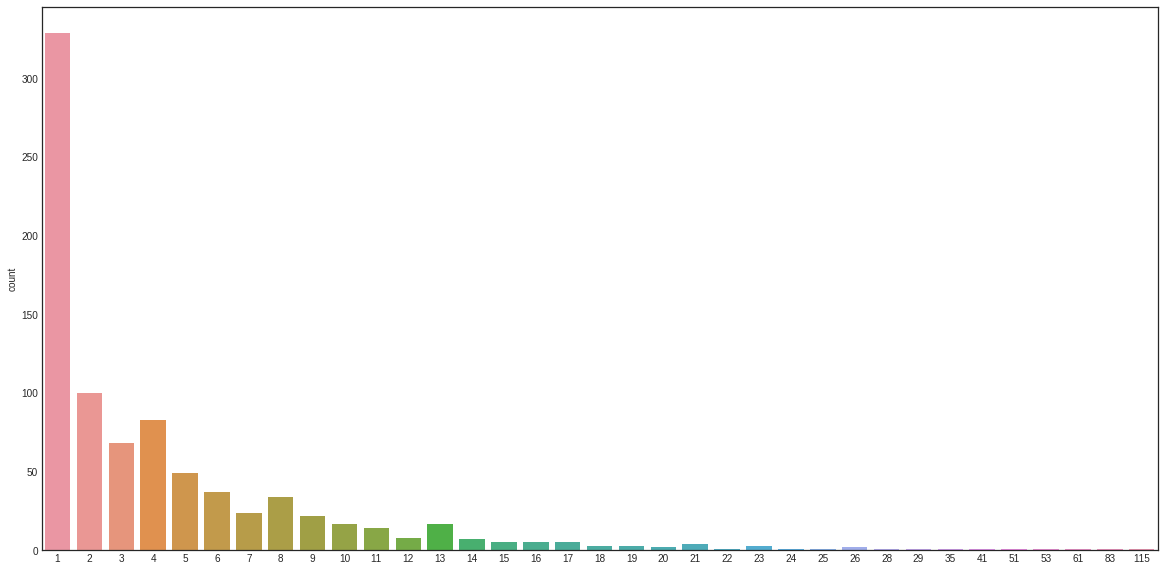

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(anno_frame.object_num.values)
plt.show()